## Import des librairies


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re
pd.options.display.float_format = "{:.2f}".format
warnings.simplefilter("ignore")

## Import des fichiers et nettoyage des données

* Import du fichier ERP 

In [2]:
# un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock
df_erp=pd.read_excel('erp.xlsx')
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.20,0,outofstock
1,3849,1,34.30,0,outofstock
2,3850,1,20.80,0,outofstock
3,4032,1,14.10,0,outofstock
4,4039,1,46.00,0,outofstock


* Vérification des dimensions

In [3]:
df_erp.shape

(825, 5)

*Il y a 825 lignes et 5 colonnes.*

* Vérification des données de la colonne onsale_web

In [4]:
df_erp['onsale_web'].unique()

array([1, 0], dtype=int64)

*On observe 2 valeurs, 1 et 0, 1 signifie que la référence est accessible sur le site web, 0 que la référence ne figure pas sur le site web.*

* Vérification du type de données

In [5]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


* Vérification des statistiques des colonnes

In [6]:
df_erp.describe()


,product_id,onsale_web,price,stock_quantity
count,825.00,825.00,825.00,825.00
mean,5162.60,0.87,32.42,26.50
std,902.64,0.34,26.80,45.89
min,3847.00,0.00,5.20,0.00
25%,4348.00,1.00,14.60,1.00
50%,4907.00,1.00,24.40,11.00
75%,5805.00,1.00,42.00,34.00
max,7338.00,1.00,225.00,578.00


* Détection des valeurs manquantes

In [7]:
print(df_erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


*Il n'y a pas de valeurs manquantes.*

* Détection des doublons

In [8]:
df_erp.loc[df_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


*Il n'y a pas de doublons.*

* Vérification dans colonne price si valeurs inférieures ou égales à 0

In [9]:
df_erp[df_erp['price']<=0]

,product_id,onsale_web,price,stock_quantity,stock_status


*Il n'y a pas de valeurs inférieures ou égales à 0 dans la colonne price.*

* Vérification dans colonne stock_quantity si valeurs inférieures à 0

In [10]:
df_erp[df_erp['stock_quantity']<0]

,product_id,onsale_web,price,stock_quantity,stock_status


*Il n'y a pas de valeurs inférieures à 0 dans la colonne stock_quantity.*

* Vérification références colonne product_id dans fichier ERP

* Import du fichier WEB

In [11]:
# un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne 
#(nom, description, nombre de ventes...)
df_web=pd.read_excel('web.xlsx')
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.00,10.00,taxable,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
1,15298,0,0,0,0.00,6.00,taxable,NaN,2.00,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
2,15296,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
3,15300,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
4,19814,0,0,0,0.00,3.00,taxable,NaN,2.00,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00


* Vérification des dimensions

In [12]:
df_web.shape


(1513, 28)

*Il y a 1513 lignes et 28 colonnes.*

* Vérification du type de données

In [13]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

* Vérification des données statistiques des colonnes

In [14]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.00,1513.00,1513.00,1430.00,1430.00,0.00,1430.00,0.00,0.00,0.00,1430.00,1430.00,1430.00
mean,0.00,0.00,0.00,0.00,4.01,NaN,2.00,NaN,NaN,NaN,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,8.51,NaN,0.04,NaN,NaN,NaN,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,NaN,2.00,NaN,NaN,NaN,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,1.00,NaN,2.00,NaN,NaN,NaN,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,4.00,NaN,2.00,NaN,NaN,NaN,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,96.00,NaN,2.00,NaN,NaN,NaN,0.00,0.00,0.00


* Détection des valeurs manquantes

In [15]:
print(df_web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


*Il y a 85 valeurs manquantes dans la colonne SKU qui sont essentielles pour identifier une vente.*

* Liste des SKU vides

In [16]:
# on stocke le df des valeurs manquantes dans un nouveau df
df_web_null=df_web.loc[df_web['sku'].isnull(),:]
df_web_null.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Suppression des valeurs nulles de la colonne SKU

In [17]:
df_web=df_web.dropna(subset=['sku']) 


* Identification des doublons

In [18]:
df_web=df_web.loc[df_web['sku'].duplicated(keep=False),:]
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.00,10.00,taxable,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
1,15298,0,0,0,0.00,6.00,taxable,NaN,2.00,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
2,15296,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
3,15300,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
4,19814,0,0,0,0.00,3.00,taxable,NaN,2.00,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00


* Recherche des valeurs uniques dans la colonne post_type

In [19]:
liste_post_type=df_web.groupby('sku')['post_type'].unique()
liste_post_type

sku
38                     [product, attachment]
41                     [product, attachment]
304                    [product, attachment]
523                    [product, attachment]
531                    [product, attachment]
                               ...          
19820                  [product, attachment]
19821                  [product, attachment]
19822                  [product, attachment]
13127-1                [product, attachment]
bon-cadeau-25-euros    [product, attachment]
Name: post_type, Length: 714, dtype: object

*Pour chaque doublon il y a 2 valeurs product et attachment dans la colonne post_type, on s'aperçoit également qu'il y a 2 valeurs de formats différents dans les sku, "bon-cadeau-25-euros" & "13127-1".*

* Recherche des valeurs qui sont différentes dans la colonne sku

In [20]:
# Utilisation du regex, utilisation de \D qui n'est pas un digit
valeurs_differentes=df_web.loc[df_web['sku'].str.contains(r'\D',na=False)]
valeurs_differentes

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.00,10.00,taxable,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
797,13127-1,0,0,0,0.00,0.00,taxable,NaN,2.00,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
1209,bon-cadeau-25-euros,0,0,0,0.00,10.00,NaN,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/wp-content/uploads/...,0.00,attachment,image/jpeg,0.00
1511,13127-1,0,0,0,0.00,0.00,NaN,NaN,2.00,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.00,https://www.bottle-neck.fr/wp-content/uploads/...,0.00,attachment,image/jpeg,0.00


* Observation des 2 valeurs de formats différents

*Après observation de ces lignes, nous les garderons dans notre analyse et ne supprimerons que les valeurs en double.*

* Observation de la colonne total_sales des colonnes attachment et product

In [21]:
# croisements de données avec la fonction crosstab
# Ici on obtient la colonne total_sales des colonnes pour les 2 valeurs attachment et product de la colonne post_type
post_type_web=pd.crosstab(df_web['total_sales'], df_web['post_type'])
post_type_web['True/False'] = np.where(post_type_web['attachment']==post_type_web['product'], 'True', 'False')
post_type_web.head()

post_type,attachment,product,True/False
total_sales,,,
0.00,329,329,True
1.00,87,87,True
2.00,40,40,True
3.00,52,52,True
4.00,30,30,True


* Vérification des valeurs False dans la colonne True/False.

In [22]:
False_values=post_type_web.loc[post_type_web['True/False']=='False']
False_values

post_type,attachment,product,True/False
total_sales,,,


*Les valeurs sont identiques pour les 2 valeurs product et attachment de la colonne total_sales, on décide de garder uniquement les product de la colonne post_type.*

* Suppression des doublons

In [25]:
df_web=df_web[df_web['post_type']=="product"]
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.00,10.00,taxable,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
1,15298,0,0,0,0.00,6.00,taxable,NaN,2.00,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
2,15296,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
3,15300,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
4,19814,0,0,0,0.00,3.00,taxable,NaN,2.00,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00


* Vérification dans colonne total_sales si valeurs inférieures à 0

In [26]:
df_web[df_web['total_sales']<0]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


*Il n'y a pas de valeurs inférieures à o.*

* Import fichier liaison

In [27]:
# tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) 
# et la référence du même produit dans la base de la boutique en ligne (SKU). 
df_liaison=pd.read_excel('liaison.xlsx')
df_liaison = df_liaison.rename(columns={'id_web':'sku'})
df_liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


* Vérification des dimensions

In [28]:
df_liaison.shape

(825, 2)

*Il y a 825 lignes et 2 colonnes.*

* Vérification du type de données

In [29]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


* Vérification des statistiques des colonnes

In [30]:
df_liaison.describe(include='all')  

,product_id,sku
count,825.00,734.00
unique,NaN,734.00
top,NaN,15298.00
freq,NaN,1.00
mean,5162.60,NaN
std,902.64,NaN
min,3847.00,NaN
25%,4348.00,NaN
50%,4907.00,NaN
75%,5805.00,NaN


* Vérification références colonne product_id dans fichier liaison

In [31]:
# Liste pour comparer avec le fichier erp
product_id_liaison=df_liaison['product_id']


* Comparaison des 2 colonnes product_id dans les 2 data frames

In [32]:
# Liste pour comparer avec le fichier liaison product_id_erp=df_erp['product_id']
product_id_erp=df_erp['product_id']
product_id_liaison.compare(product_id_erp,align_axis=0)

Series([], Name: product_id, dtype: float64)

*Les 2 fichiers ont les mêmes références product_id.*

* Détectection des valeurs manquantes

In [33]:
print(df_liaison.isnull().sum())

product_id     0
sku           91
dtype: int64


* Liste des SKU vides

In [34]:
df_liaison.loc[df_liaison['sku'].isnull(),:]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


*Il y a 91 valeurs manquantes dans la colonne SKU, cela correspond aux références qui ne sont pas en vente sur le site Web.*

* Suppression des valeurs nulles

In [35]:
df_liaison=df_liaison.dropna(subset=['sku']) 


* Détectection des doublons

In [36]:
df_liaison.loc[df_liaison[['product_id','sku']].duplicated(keep=False),:]

,product_id,sku


*Il n'y a pas de doublons.*

 # I - Rapprochement des 2 exports et du tableau excel réalisé par Sylvie

## Fusion des fichiers ERP & liaison

In [37]:
# Jointure à gauche sur le df df_erp, clé product_id
df_erp_liaison=pd.merge(df_erp,df_liaison,on=['product_id'],how='left')
df_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.20,0,outofstock,15298
1,3849,1,34.30,0,outofstock,15296
2,3850,1,20.80,0,outofstock,15300
3,4032,1,14.10,0,outofstock,19814
4,4039,1,46.00,0,outofstock,19815


In [38]:
df_erp_liaison.shape

(825, 6)

*Il y a 825 lignes et 6 colonnes.*

## Fusion des Fichiers ERP, liaison & WEB 

In [39]:
# Jointure à gauche sur le df_erp_liaison, clé sku
df_bottleneck=pd.merge(df_erp_liaison,df_web,on=['sku'],how='inner')
df_bottleneck.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.20,0,outofstock,15298,0,0,0,0.00,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
1,3849,1,34.30,0,outofstock,15296,0,0,0,0.00,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
2,3850,1,20.80,0,outofstock,15300,0,0,0,0.00,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
3,4032,1,14.10,0,outofstock,19814,0,0,0,0.00,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00
4,4039,1,46.00,0,outofstock,19815,0,0,0,0.00,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&...,0.00,product,NaN,0.00


* Liste des sku manquants

*Taille du data frame bottleneck*

In [41]:
df_bottleneck.shape

(714, 33)

*Il y a 714 lignes et 33 colonnes.*

* Création d'un nouveau data frame pour l'analyse

In [42]:
df_bottleneck_analyse=df_bottleneck[['product_id','onsale_web','price','stock_quantity','sku','total_sales','post_title']]
df_bottleneck_analyse.head()


,product_id,onsale_web,price,stock_quantity,sku,total_sales,post_title
0,3847,1,24.20,0,15298,6.00,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,1,34.30,0,15296,0.00,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,1,20.80,0,15300,0.00,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,1,14.10,0,19814,3.00,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,1,46.00,0,19815,0.00,Pierre Jean Villa Côte Rôtie Carmina 2017


# II - Calcul du chiffre d'affaires par produits

* Creation d'une nouvelle colonne chiffre d'affaires par produits

In [43]:
# Création d'une nouvelle colonne triée par ordre décroissant
df_bottleneck_analyse['ca_product'] = df_bottleneck_analyse['price']* df_bottleneck_analyse['total_sales']
df_bottleneck_analyse.sort_values(by=['ca_product'], ascending = False).head(10)


,product_id,onsale_web,price,stock_quantity,sku,total_sales,post_title,ca_product
194,4334,1,49.00,0,7818,96.00,Champagne Gosset Grand Blanc de Blancs,4704.00
71,4144,1,49.00,11,1662,87.00,Champagne Gosset Grand Rosé,4263.00
218,4402,1,176.00,8,3510,13.00,Cognac Frapin VIP XO,2288.00
70,4142,1,53.00,8,11641,30.00,Champagne Gosset Grand Millésime 2006,1590.00
69,4141,1,39.00,1,304,40.00,Champagne Gosset Grande Réserve,1560.00
201,4355,1,126.50,2,12589,11.00,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.50
199,4352,1,225.00,0,15940,5.00,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.00
79,4153,1,29.00,0,16237,36.00,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.00
651,6206,1,25.20,120,16580,41.00,Domaine Giudicelli Patrimonio Blanc 2019,1033.20
30,4068,1,16.60,157,16416,62.00,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.20


# III - Calcul du chiffre d'affaires total

In [44]:
ca_total = df_bottleneck_analyse['ca_product'].sum()

print("Le chiffre d'affaires réalisé en ligne est de", ca_total, "€")



Le chiffre d'affaires réalisé en ligne est de 70568.6 €


# IV - Analyse des prix

* Observation de la colonne prix

In [45]:
df_bottleneck_analyse['price'].describe()

count   714.00
mean     32.49
std      27.81
min       5.20
25%      14.10
50%      23.55
75%      42.18
max     225.00
Name: price, dtype: float64

* Utilisation des mesures de tendance centrale

In [46]:
# Calcul du mode (valeur la plus fréquente)
df_bottleneck_analyse['price'].mode()

0   19.00
Name: price, dtype: float64

In [47]:
# Calcul de la médiane (autant de valeur au-dessus qu'en-dessous)
df_bottleneck_analyse['price'].median()

23.55

* Il y a 714 valeurs.
* Le prix minimum est de 5,20 €  et le prix maximum est de 225,00 €.
* La moyenne est de 32,49 €.
* La médiane est de 23,55 €. 
On constate que la moyenne est différente de la médiane.
* Le mode est de 19 €.


* Détection numérique des outliers 

In [48]:
#L’IQR ou écart interquartile en Français est une mesure de dispersion des données.
# Cela correspond à la différence entre le 3ème et le 1er quartile (Q3 et Q1, les limites de la “boîte” à moustache).
# Le premier quartile est la plus petite valeur Q_{1} de la série de données tel que 25% au moins des autres valeurs
#lui sont inférieures ou égales.
# Le troisième quartile est la plus petite valeur Q_{3} de la série de données tel que 75% au moins des autres valeurs lui 
# sont inférieures ou égales.
# On considère qu’une valeur est extrême (mais pas forcément aberrante) si sa valeur est inférieure à la valeur du Q1-1,5 fois
# l’IQR, ou supérieure au Q3 + 1,5 fois l’IQR.  
# Ce sont des valeurs qui sont très éloignées de la majorité des autres valeurs, ce qui les rend “suspectes”.


Q1 = df_bottleneck_analyse['price'].quantile(q=0.25)
Q3 = df_bottleneck_analyse['price'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq

outliers_inf = df_bottleneck_analyse['price'] <limite_outliers_inf
outliers_sup = df_bottleneck_analyse['price'] > limite_outliers_sup

print("Limite pour les outliers inférieurs:\n", round(limite_outliers_inf,2))
print("Limite pour les outliers supérieurs:\n", round(limite_outliers_sup,2))


Limite pour les outliers inférieurs:
 -28.01
Limite pour les outliers supérieurs:
 84.29


In [49]:
print ("La limite inférieure est négative, elle est de", round(limite_outliers_inf,2), "€, il n'y a pas d'outlier inférieur, le prix minimum est de 5,20  €.")
print("La limite supérieure est de", round(limite_outliers_sup,2), "€. Le prix maximum est de 225 €, on sait donc qu'il y a au moins un outlier supérieur, on les identifie dans un nouveau data frame.")


La limite inférieure est négative, elle est de -28.01 €, il n'y a pas d'outlier inférieur, le prix minimum est de 5,20  €.
La limite supérieure est de 84.29 €. Le prix maximum est de 225 €, on sait donc qu'il y a au moins un outlier supérieur, on les identifie dans un nouveau data frame.


* Identification des outliers supérieurs à 84,29 €

In [50]:
# Utilisation fonction .loc pour identifier les lignes
# Utilisation de la méthode sort_values pour trier la colonne price en fonction des valeurs, dans l'ordre décroissant
df_bottleneck_outliers=df_bottleneck_analyse.loc[(df_bottleneck_analyse['price']>limite_outliers_sup),('sku','product_id','price','post_title')] 
df_bottleneck_outliers.sort_values(by=['price'], ascending = False).head(37)

,sku,product_id,price,post_title
199,15940,4352,225.00,Champagne Egly-Ouriet Grand Cru Millésimé 2008
426,14581,5001,217.50,David Duband Charmes-Chambertin Grand Cru 2014
587,14983,5892,191.30,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
218,3510,4402,176.00,Cognac Frapin VIP XO
553,15185,5767,175.00,Camille Giroud Clos de Vougeot 2016
221,7819,4406,157.00,Cognac Frapin Château de Fontpinot 1989 20 Ans...
381,14220,4904,137.00,Domaine Des Croix Corton Charlemagne Grand Cru...
642,14923,6126,135.00,Champagne Gosset Célébris Vintage 2007
201,12589,4355,126.50,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
511,14915,5612,124.80,Domaine Weinbach Gewurztraminer Grand Cru Furs...


* Vérification des statistiques des colonnes

In [51]:
df_bottleneck_outliers.describe()

,product_id,price
count,32.00,32.00
mean,5267.94,124.57
std,766.70,36.07
min,4115.00,85.60
25%,4406.75,103.58
50%,5025.50,114.50
75%,5970.00,128.62
max,6216.00,225.00


* Représentation graphique en boxplot

Text(0.5, 1.0, 'Evolution des ventes des produits vendus par la société Bottleneck')

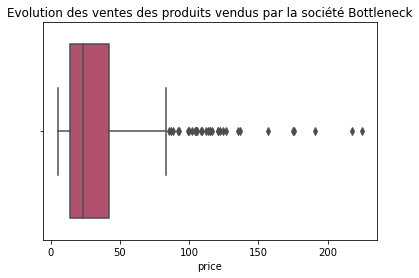

In [52]:
Boxplot = sns.boxplot(x=df_bottleneck['price'],palette='flare')
plt.title("Evolution des ventes des produits vendus par la société Bottleneck")

# Rappel : Le quartile est calculé en tant que 4-quantiles :
#le 1er quartile est la donnée de la série qui sépare les 25 % inférieurs des données
#le 2e quartile est la donnée de la série qui sépare la série en deux parties (50 %) de la série. 
#il est également appelé médiane
#le 3e quartile est la donnée de la série qui sépare les 25 % supérieurs des données.


 

*On peut distinguer la boîte en rouge, le premier et le troisième quartile.
La médiane est représentée par la ligne, les 32 outliers sont représentés sur la droite du graphique.*


Après analyse de ces différents fichiers, il n'apparaît pas d'erreurs de saisie dans les prix.
Le chiffre d'affaires total est de 70 568.60 €.
Nous avons identifié 32 outliers au-dessus de 84,29 €, après vérifications dans les fichiers, les tarifs semblent être en adéquation avec ceux proposés par la société Bottleneck, étant une société qui vend des vins prestigieux.